In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
with open('/content/drive/MyDrive/Dataset/T20 Dataset/t20_json_files/t20_json_files/t20_wc_match_results.json') as f:
  data = json.load(f)

# data

In [ ]:
df_matches = pd.DataFrame(data[0]['matchSummary'])
df_matches.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [ ]:
df_matches.shape

(45, 7)

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      45 non-null     object
 1   team2      45 non-null     object
 2   winner     45 non-null     object
 3   margin     45 non-null     object
 4   ground     45 non-null     object
 5   matchDate  45 non-null     object
 6   scorecard  45 non-null     object
dtypes: object(7)
memory usage: 2.6+ KB


In [ ]:
df_matches['scorecard'].nunique()

45

* We can create scorecard as primary key to merge with other tables.

In [ ]:
df_matches.rename({'scorecard': 'match_id'}, axis=1, inplace=True)

In [ ]:
df_matches.isnull().sum()

team1        0
team2        0
winner       0
margin       0
ground       0
matchDate    0
match_id     0
dtype: int64

## Reading Batting Summary

In [ ]:
with open ('/content/drive/MyDrive/Dataset/T20 Dataset/t20_json_files/t20_json_files/t20_wc_batting_summary.json') as f:
  data = json.load(f)

  records = []

  for x in data:
    records.extend(x['battingSummary'])

df_batting_summary = pd.DataFrame(records)
df_batting_summary.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33


In [ ]:
df_batting_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   dismissal    699 non-null    object
 5   runs         699 non-null    object
 6   balls        699 non-null    object
 7   4s           699 non-null    object
 8   6s           699 non-null    object
 9   SR           699 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


* Converting dismissal feature to "Out/Not Out"

In [ ]:
df_batting_summary['dismissal'] = ["out" if x!="" else "Not Out" for x in df_batting_summary['dismissal']]
df_batting_summary['dismissal'].head()

0    out
1    out
2    out
3    out
4    out
Name: dismissal, dtype: object

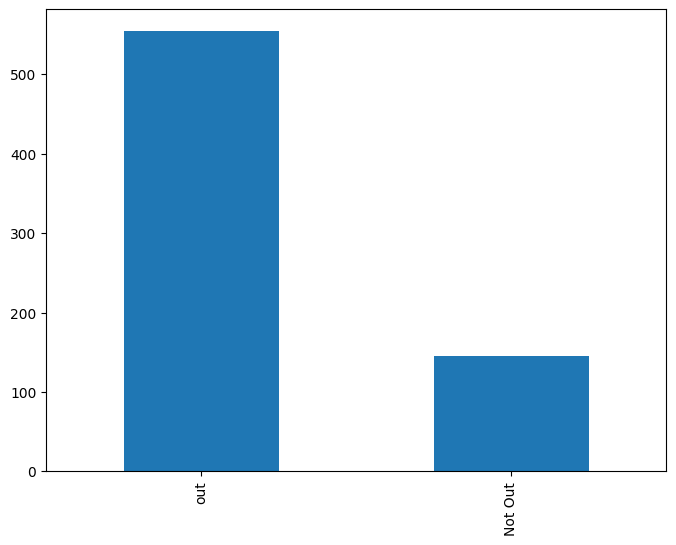

In [ ]:
plt.figure(figsize=(8, 6))
df_batting_summary['dismissal'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df_batting_summary.rename({'dismissal': 'Out/Not Out'}, axis=1, inplace=True)

In [ ]:
df_batting_summary.head(10)

,match,teamInnings,battingPos,batsmanName,Out/Not Out,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,out,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,out,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,out,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,out,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),out,20,24,0,0,83.33
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,out,44,28,4,0,157.14
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,out,0,1,0,0,0.00
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,Not Out,31,16,2,2,193.75
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,out,9,10,1,0,90.00
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,out,6,6,0,0,100.00


* In order to merge both the data I can use match and teams name from tables by creating a dictionary.
* I am going to create ids for both side "Namibia Vs Sri Lanka" and "Sri Lanka Vs Namibia".

In [ ]:
# Creating dictionary for mapping
match_dict = {}

for index, row in df_matches.iterrows():
  comb1 = row['team1'] + " Vs " + row['team2']
  comb2 = row['team2'] + " Vs " + row['team1']

  match_dict[comb1] = row['match_id']
  match_dict[comb2] = row['match_id']

# match_dict

* I can use above dictionary and create match_id for batting summary dataframe to merge both the tables.

In [ ]:
df_batting_summary['match_id'] = df_batting_summary['match'].map(match_dict)
df_batting_summary.head()

,match,teamInnings,battingPos,batsmanName,Out/Not Out,runs,balls,4s,6s,SR,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,out,3,6,0,0,50.00,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,out,9,9,1,0,100.00,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,out,20,12,1,2,166.66,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,out,26,24,2,0,108.33,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),out,20,24,0,0,83.33,T20I # 1823


In [ ]:
df_batting_summary['batsmanName'] = df_batting_summary['batsmanName'].apply(lambda x: x.replace('â€', ''))
df_batting_summary['batsmanName'] = df_batting_summary['batsmanName'].apply(lambda x: x.replace('\xa0', ''))
df_batting_summary.head()

,match,teamInnings,battingPos,batsmanName,Out/Not Out,runs,balls,4s,6s,SR,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,out,3,6,0,0,50.00,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,out,9,9,1,0,100.00,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,out,20,12,1,2,166.66,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,out,26,24,2,0,108.33,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),out,20,24,0,0,83.33,T20I # 1823


In [ ]:
df_batting_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   Out/Not Out  699 non-null    object
 5   runs         699 non-null    object
 6   balls        699 non-null    object
 7   4s           699 non-null    object
 8   6s           699 non-null    object
 9   SR           699 non-null    object
 10  match_id     699 non-null    object
dtypes: int64(1), object(10)
memory usage: 60.2+ KB


In [ ]:
df_batting_summary['SR'].unique()

array(['50.00', '100.00', '166.66', '108.33', '83.33', '157.14', '0.00',
       '193.75', '90.00', '109.09', '95.23', '126.08', '62.50', '-',
       '53.33', '60.00', '87.23', '107.14', '85.71', '71.42', '142.85',
       '127.77', '77.77', '89.47', '84.21', '93.75', '124.52', '117.64',
       '114.28', '164.28', '66.66', '145.45', '153.84', '107.69',
       '113.33', '55.55', '44.44', '115.15', '75.00', '115.78', '170.83',
       '25.00', '200.00', '122.72', '120.00', '137.50', '63.63', '105.26',
       '86.36', '89.58', '88.88', '220.00', '125.00', '125.80', '20.00',
       '123.33', '138.46', '72.72', '73.68', '33.33', '90.47', '112.50',
       '156.36', '133.33', '137.03', '130.76', '80.00', '116.66', '87.50',
       '225.00', '144.44', '142.10', '175.00', '22.22', '131.81', '37.50',
       '179.54', '103.33', '146.15', '160.00', '133.96', '140.00',
       '121.95', '65.62', '148.27', '178.57', '16.66', '82.35', '152.77',
       '104.16', '72.22', '129.16', '118.18', '158.33', '160.

In [ ]:
df_batting_summary['SR'] = df_batting_summary['SR'].replace('-', '0.0')

In [ ]:
df_batting_summary['SR'] = df_batting_summary['SR'].astype(float)
df_batting_summary['4s'] = df_batting_summary['4s'].astype(int)
df_batting_summary['6s'] = df_batting_summary['6s'].astype(int)

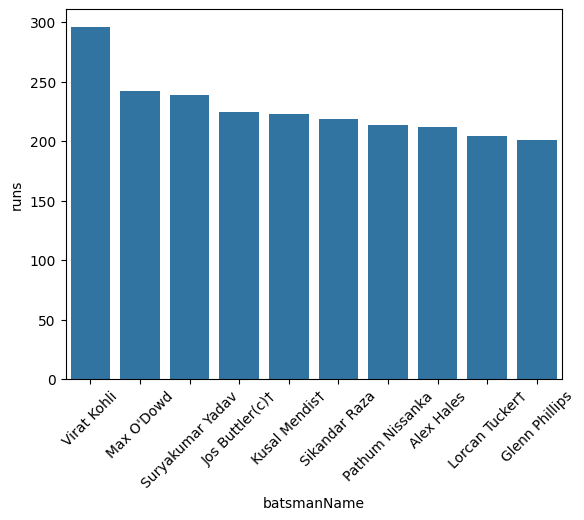

In [ ]:
# Top - 10 batsman of the seires

top_10_batsman = df_batting_summary.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(10)

sns.barplot(top_10_batsman)
plt.xticks(rotation=45)
plt.show()

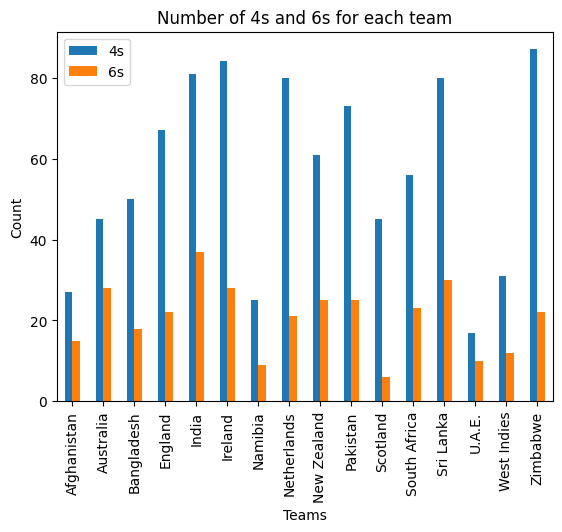

In [ ]:
# Number of 4s and 6s for each team

df_batting_summary.groupby('teamInnings')[['4s', '6s']].sum().plot(kind='bar')
plt.title("Number of 4s and 6s for each team")
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.show()

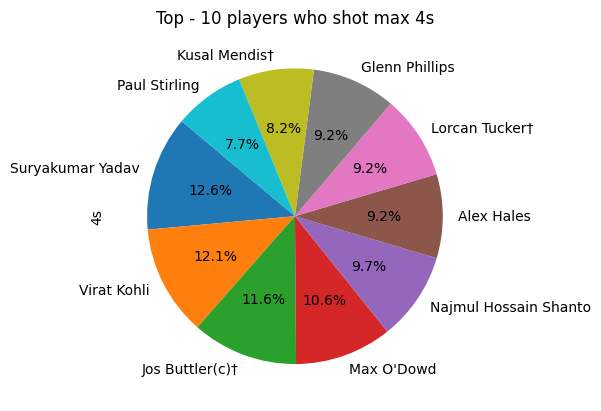

In [ ]:
# Top - 10 players who shot max 4s

top_10_batsman_with_4s = df_batting_summary.groupby('batsmanName')['4s'].sum().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top - 10 players who shot max 4s")
plt.show()

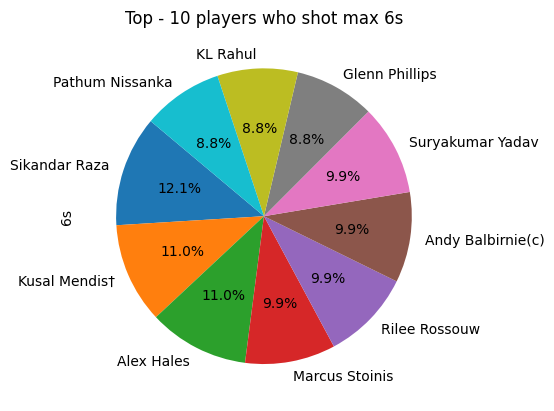

In [ ]:
# Top - 10 players who shot max 6s

top_10_batsman_with_6s = df_batting_summary.groupby('batsmanName')['6s'].sum().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top - 10 players who shot max 6s")
plt.show()

# Bowling Summary

In [ ]:
with open('/content/drive/MyDrive/Dataset/T20 Dataset/t20_json_files/t20_json_files/t20_wc_bowling_summary.json') as f:
  data = json.load(f)

  records = []

  for rec in data:
    records.extend(rec['bowlingSummary'])

df_bowling_summary = pd.DataFrame(records)
df_bowling_summary.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0


In [ ]:
df_bowling_summary['match_id'] = df_bowling_summary['match'].map(match_dict)
df_bowling_summary.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [ ]:
df_bowling_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        500 non-null    object
 1   bowlingTeam  500 non-null    object
 2   bowlerName   500 non-null    object
 3   overs        500 non-null    object
 4   maiden       500 non-null    object
 5   runs         500 non-null    object
 6   wickets      500 non-null    object
 7   economy      500 non-null    object
 8   0s           500 non-null    object
 9   4s           500 non-null    object
 10  6s           500 non-null    object
 11  wides        500 non-null    object
 12  noBalls      500 non-null    object
 13  match_id     500 non-null    object
dtypes: object(14)
memory usage: 54.8+ KB


In [ ]:
df_bowling_summary['maiden'] = df_bowling_summary['maiden'].astype(int)
df_bowling_summary['4s'] = df_bowling_summary['4s'].astype(int)
df_bowling_summary['6s'] = df_bowling_summary['6s'].astype(int)
df_bowling_summary['0s'] = df_bowling_summary['0s'].astype(int)
df_bowling_summary['economy'] = df_bowling_summary['economy'].astype(float)
df_bowling_summary['wickets'] = df_bowling_summary['wickets'].astype(int)
df_bowling_summary['runs'] = df_bowling_summary['runs'].astype(int)
df_bowling_summary['wides'] = df_bowling_summary['wides'].astype(int)
df_bowling_summary['noBalls'] = df_bowling_summary['noBalls'].astype(int)
df_bowling_summary['overs'] = df_bowling_summary['overs'].astype(float)

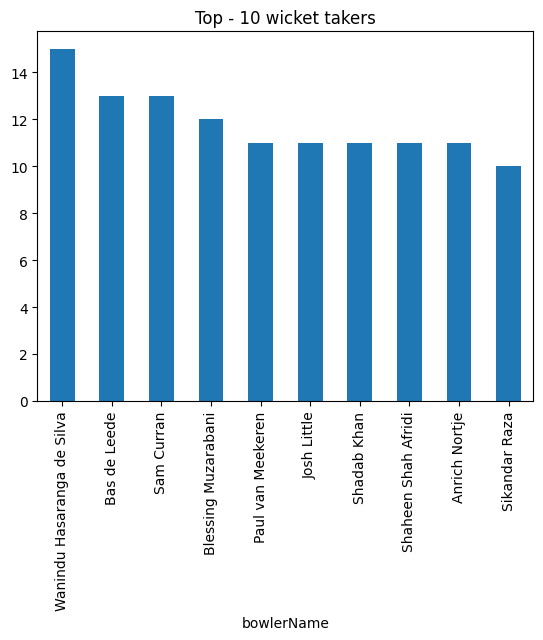

In [ ]:
# Top - 10 wicket takers

top_10_wicket_takers = df_bowling_summary.groupby('bowlerName')['wickets'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top - 10 wicket takers")
plt.show()

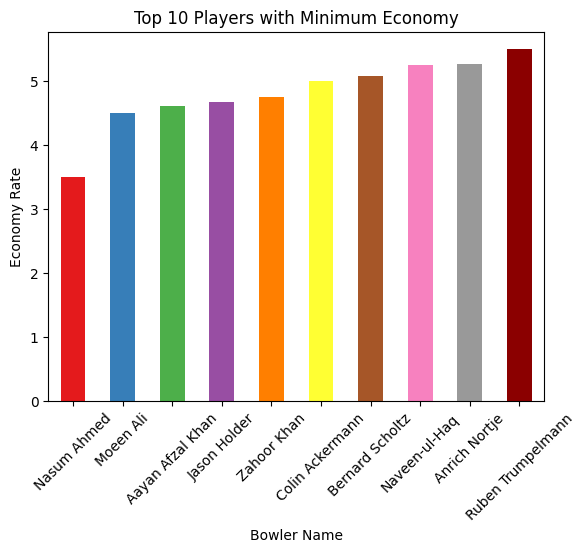

In [ ]:
# Top - 10 players with minimum economy

top_10_wicket_takers = df_bowling_summary.groupby('bowlerName')['economy'].mean().sort_values(ascending=True).head(10)
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', 'darkred']
top_10_wicket_takers.plot(kind='bar', color=colors)
plt.title("Top 10 Players with Minimum Economy")
plt.ylabel('Economy Rate')
plt.xlabel('Bowler Name')
plt.xticks(rotation=45)
plt.show()

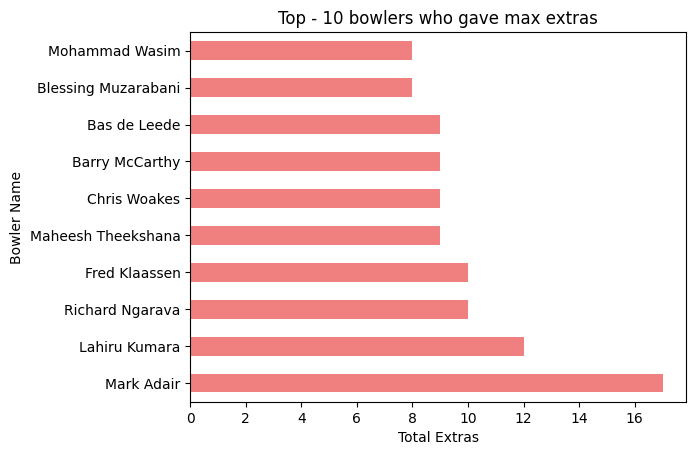

In [ ]:
max_wides = df_bowling_summary.groupby('bowlerName')['wides'].sum().sort_values(ascending=False)
no_balls = df_bowling_summary.groupby('bowlerName')['noBalls'].sum().sort_values(ascending=False)

total_extras = max_wides + no_balls
total_extras.sort_values(ascending=False).head(10).plot(kind='barh', color='lightcoral')
plt.ylabel('Bowler Name')
plt.xlabel('Total Extras')
plt.title("Top - 10 bowlers who gave max extras")
plt.show()

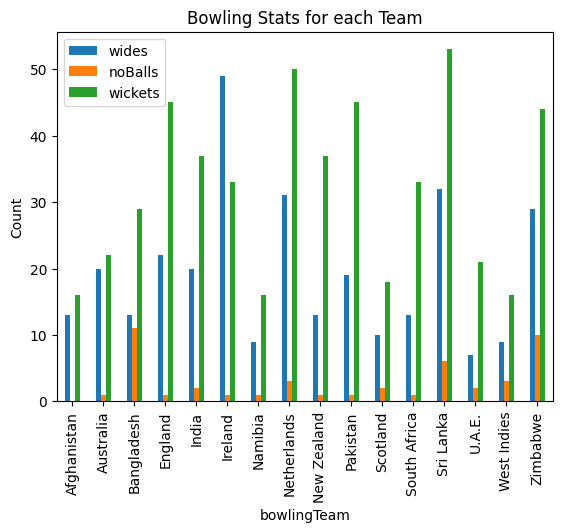

In [ ]:
df_bowling_summary.groupby('bowlingTeam')[['wides', 'noBalls', 'wickets']].sum().plot(kind='bar')
plt.title('Bowling Stats for each Team')
plt.ylabel('Count')
plt.show()

In [ ]:
df_bowling_summary.isnull().sum()

match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
match_id       0
dtype: int64

In [ ]:
df_bowling_summary.to_csv('final_bowling_summary.csv', index = False)
df_batting_summary.to_csv('final_batting_summary.csv', index=False)
df_matches.to_csv('final_match_summary.csv', index=False)

# Player Information

In [ ]:
with open('/content/drive/MyDrive/Dataset/T20 Dataset/t20_json_files/t20_json_files/t20_wc_player_info.json') as f:
  data = json.load(f)

df_player_summary = pd.DataFrame(data)
df_player_summary.head()

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,


In [ ]:
df_player_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          219 non-null    object
 1   team          219 non-null    object
 2   battingStyle  219 non-null    object
 3   bowlingStyle  219 non-null    object
 4   playingRole   219 non-null    object
 5   description   219 non-null    object
dtypes: object(6)
memory usage: 10.4+ KB


In [ ]:
df_player_summary['description'].nunique()

147

In [ ]:
df_player_summary['description']

0                                                       
1                                                       
2                                                       
3                                                       
4                                                       
                             ...                        
214    A left-arm wristspin bowler with ample variati...
215    Phil Salt's fearless ball-striking at the top ...
216    Chris Jordan, a fast bowler with a level-heade...
217    A doughty wicketkeeper-batsman, Regis Chakabva...
218    Mehedi Hasan Miraz has emerged as one of the b...
Name: description, Length: 219, dtype: object

* Description of few players is missing.

In [ ]:
df_player_summary['name'] = df_player_summary['name'].apply(lambda x: x.replace('â€', ''))
df_player_summary['name'] = df_player_summary['name'].apply(lambda x: x.replace('†', ''))
df_player_summary['name'] = df_player_summary['name'].apply(lambda x: x.replace('\xa0', ''))
df_player_summary.head(10)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendis,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [ ]:
df_player_summary[df_player_summary['team'] == 'India']

,name,team,battingStyle,bowlingStyle,playingRole,description
127,KL Rahul,India,Right hand Bat,,Opening Batter,"A tall, elegant right-hand batsman who can kee..."
128,Rohit Sharma(c),India,Right hand Bat,Right arm Offbreak,Top order Batter,"Languid and easy on the eye, Rohit Sharma owne..."
129,Virat Kohli,India,Right hand Bat,Right arm Medium,Top order Batter,India has given to the world many a great cric...
130,Suryakumar Yadav,India,Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,Hard-hitting 360-degree batter Suryakumar Yada...
131,Axar Patel,India,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,Left-arm spinner Axar Patel has been increasin...
132,Hardik Pandya,India,Right hand Bat,Right arm Medium fast,Allrounder,Hardik Pandya swears by living life king size ...
133,Dinesh Karthik,India,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Not many would forget the sight of Dinesh Kart...
134,Ravichandran Ashwin,India,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
135,Bhuvneshwar Kumar,India,Right hand Bat,Right arm Medium,Bowler,"At the time of his India debut in 2012, Bhuvne..."
136,Arshdeep Singh,India,Left hand Bat,Left arm Medium fast,Bowler,


In [ ]:
df_player_summary.to_csv('final_player_summary.csv', index=False)